In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.animation as animation
from python_analysis import *
from numpy import random
from sklearn.linear_model import LinearRegression
from scipy.signal import argrelextrema


In [2]:
# impose dimensions of figures and font

plt.rcParams["figure.figsize"] = (25,15)
plt.rcParams.update({'font.size': 23})

# MOL for (1+1) dimensional system of equation

In [3]:

# we need informations to find the files:

# amplitudes vector, contains the amplitudes of the file we want to analyze
amplitude_vector = [1]
# time
range_time = 40
number_steps= 500
len_step = range_time / number_steps
times = np.arange(0,range_time+len_step/2,len_step)

epsilon = [0.00 ]
dx = 0.05

number_of_proc = 4

model = "hyperboloidal_wave_equation"
data = [3]
names = names_generator(data,epsilon,amplitude_vector,number_of_proc,model,dx,number_steps,range_time)

print(len(names)/4)
#-2.313328 -2.316648 -2.319366 -2.321592 -2.323414 -2.324906 -2.326127 -2.327127 -2.327946 -2.328616 -2.329165 -2.329614 -2.329982 -2.330283 -2.330530 -2.330732 -2.330897 -2.331032 -2.331143

1.0


In [4]:
big_DF = []

In [5]:
%%time
h1 = float(dx)
h2 = h1/2
h3 = h2/2
domain_lenght = 5
dmin = 0
dmax = 5
gl = 2
gr = 2
for p in range(int(len(names)/4)):
    print("----->",p)
    big_DF=big_DF+read_parallel_data(dmax,dmin,gl,gr,domain_lenght,h1,h2,h3,number_of_proc,number_steps,names[p*4:p*4+4])
print(len(big_DF))

-----> 0
[105, 205, 405]
24 27 30
run:0 ->./data3/processor_0_ampl_1.000000_eps0.000000_dx_0.050000steps500last_time40.000000.csv added
number of runs: 4
1
CPU times: user 6.79 s, sys: 253 ms, total: 7.04 s
Wall time: 6.51 s


In [156]:
pd.set_option("display.precision",20)

In [157]:
big_DF[0][0][0]


,index,x,field0,field1,field2
0,0,-0.10000000000000000555,-0.00000964534167356473,-0.09146337037212856624,1.00458930655847256119
1,1,-0.05000000000000000278,-0.00000120141922913022,-0.04593260592171359569,1.00114932948069212948
2,2,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,1.00000000000000000000
3,3,0.05000000000000000278,-0.00000120141922913022,0.04593260592171359569,1.00114932948069212948
4,4,0.10000000000000000555,-0.00000964534167356473,0.09146337037212856624,1.00458930655847256119
...,...,...,...,...,...
100,25,4.90000000000000035527,0.17621913964952409803,-0.17621963458980399730,0.93774303245294066134
101,26,4.95000000000000017764,0.18017029671431245008,-0.18017035706237125026,0.92880959043516608808
102,27,5.00000000000000000000,0.18393972058572116701,-0.18393972058572116701,0.91969860292860583506
103,28,5.05000000000000071054,0.18752800843731859404,-0.18752791377383706828,0.91041839644720390368


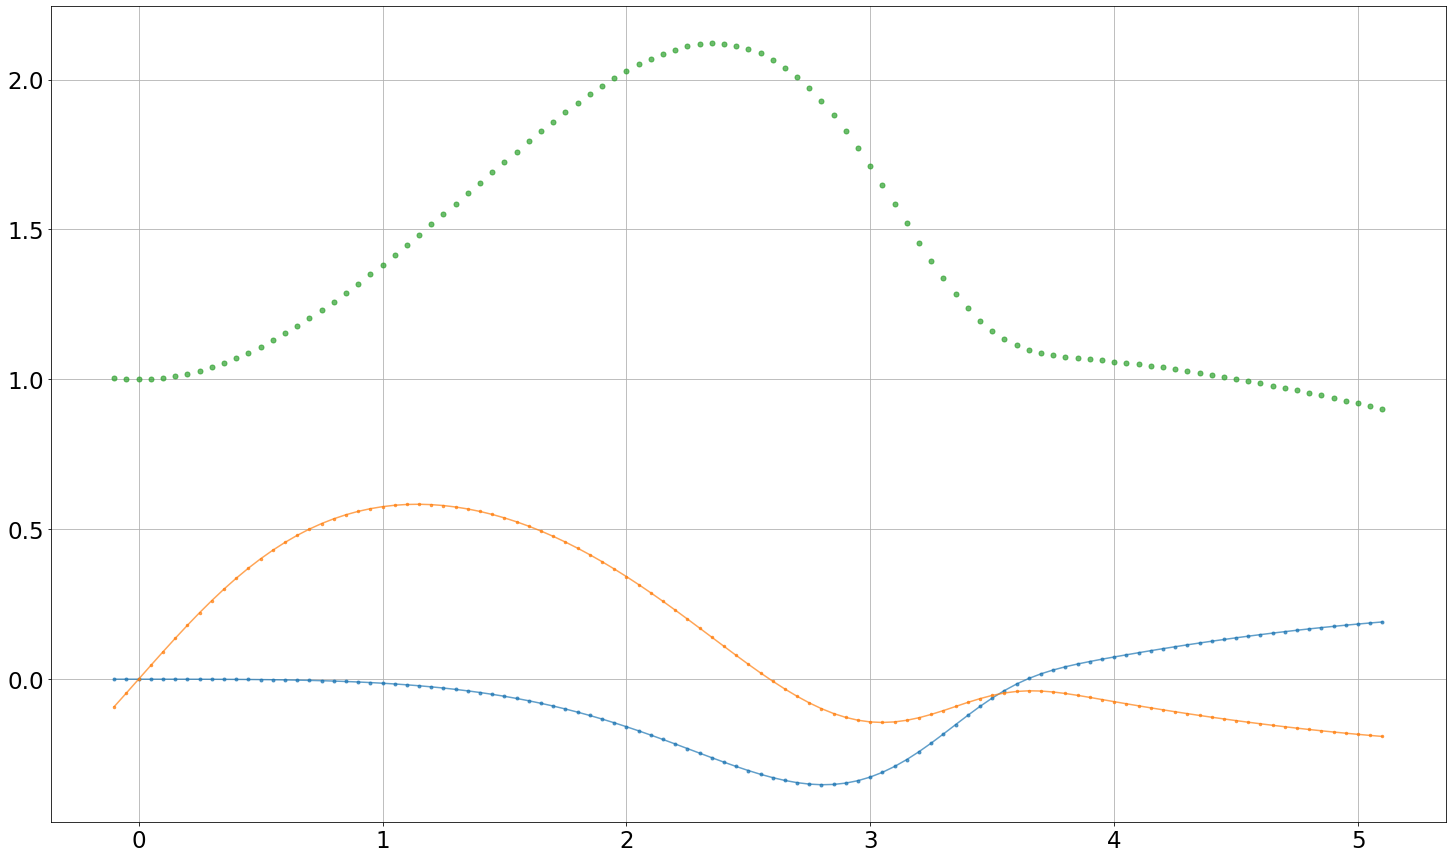

In [144]:
# plot of the initial conditions
for n in range(0,1):
    for i in range(0,1):
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field0'],'.-',alpha=0.7,label="field 0")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field1'],'.-',alpha=0.7,markersize=5,label="field 1")
            plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field2'],'.',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field3'],'.',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field4'],'.',alpha=0.7,markersize=10,label="field 2")
            #plt.plot(big_DF[n][i][0]['x'],big_DF[n][i][0]['field5'],'.',alpha=0.7,markersize=10,label="field 2")


#plt.legend()
plt.grid()
#plt.xlim([-1, 5.5])
#plt.ylim([-10, 1])

In [145]:
%matplotlib inline

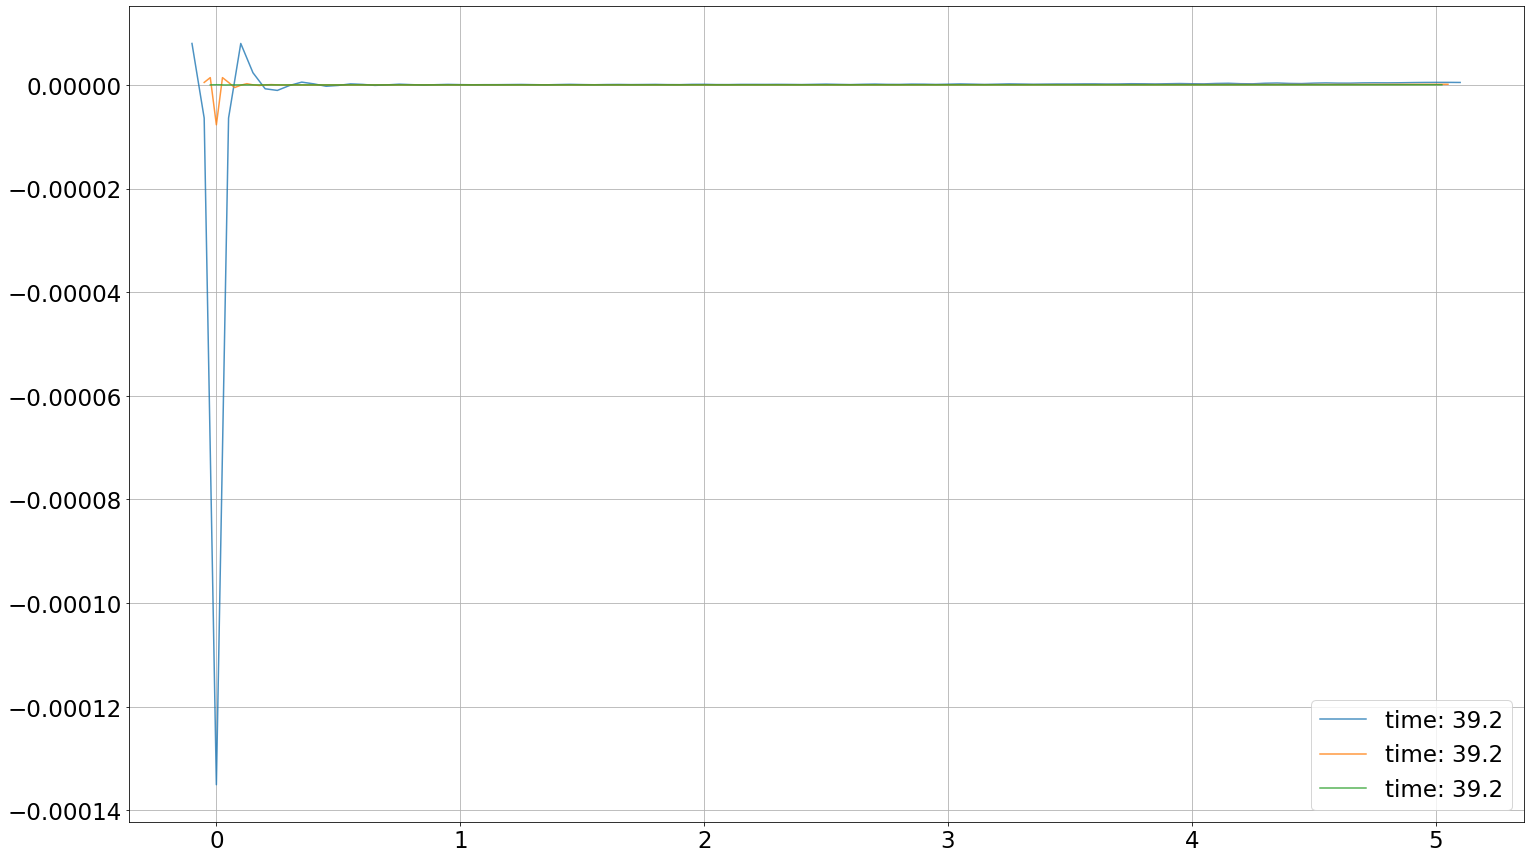

In [158]:
for n in [0]:
    for i in range(0,3):        
        for j in range(98,99):
            #plt.plot(X[j],big_DF[n][i][j]['field0'],alpha=0.6,markersize=15,label="time:"+str(times[j])+"e:"+amplitude_vector[n])
            plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field0'],alpha=0.8,markersize=8,label="time: "+str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field1'],alpha=0.5,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field2'],alpha=0.75,markersize=5,label=epsilon[n])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field3'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field4'],alpha=0.8,markersize=8,label=times[j])
            #plt.plot(big_DF[n][i][j]['x'],big_DF[n][i][j]['field5'],alpha=0.8,markersize=8,label="5")
            #plt.plot(big_DF[n][i][j]['x'],model3_gaussian_solution(big_DF[n][i][j]['x'],times[j],float(amplitude_vector[0])),markersize=5,alpha=0.7,label="teo,time:"+str(times[j]))
            #plt.plot(big_DF[n][i][j]['x'],spherical_we_solution(big_DF[n][i][j]['x'],times[j],1,1))
            #plt.plot(big_DF[n][i][j]['x'],hyperbolic_chi_we_solution(big_DF[n][i][j]['x'],times[j],1,1/5,5),'.-',alpha=0.5,label='theoretical')
            #plt.plot(big_DF[n][i][j]['x'],initial_test(big_DF[n][i][j]['x'],times[j],1,1./5.,5))
            
plt.grid()
#plt.xlim([-5.5,-4])
#plt.ylim([ -0.000001,0.000001] )
#plt.yscale('log')
plt.legend()


## Convergence test and out put

### Self convergence test

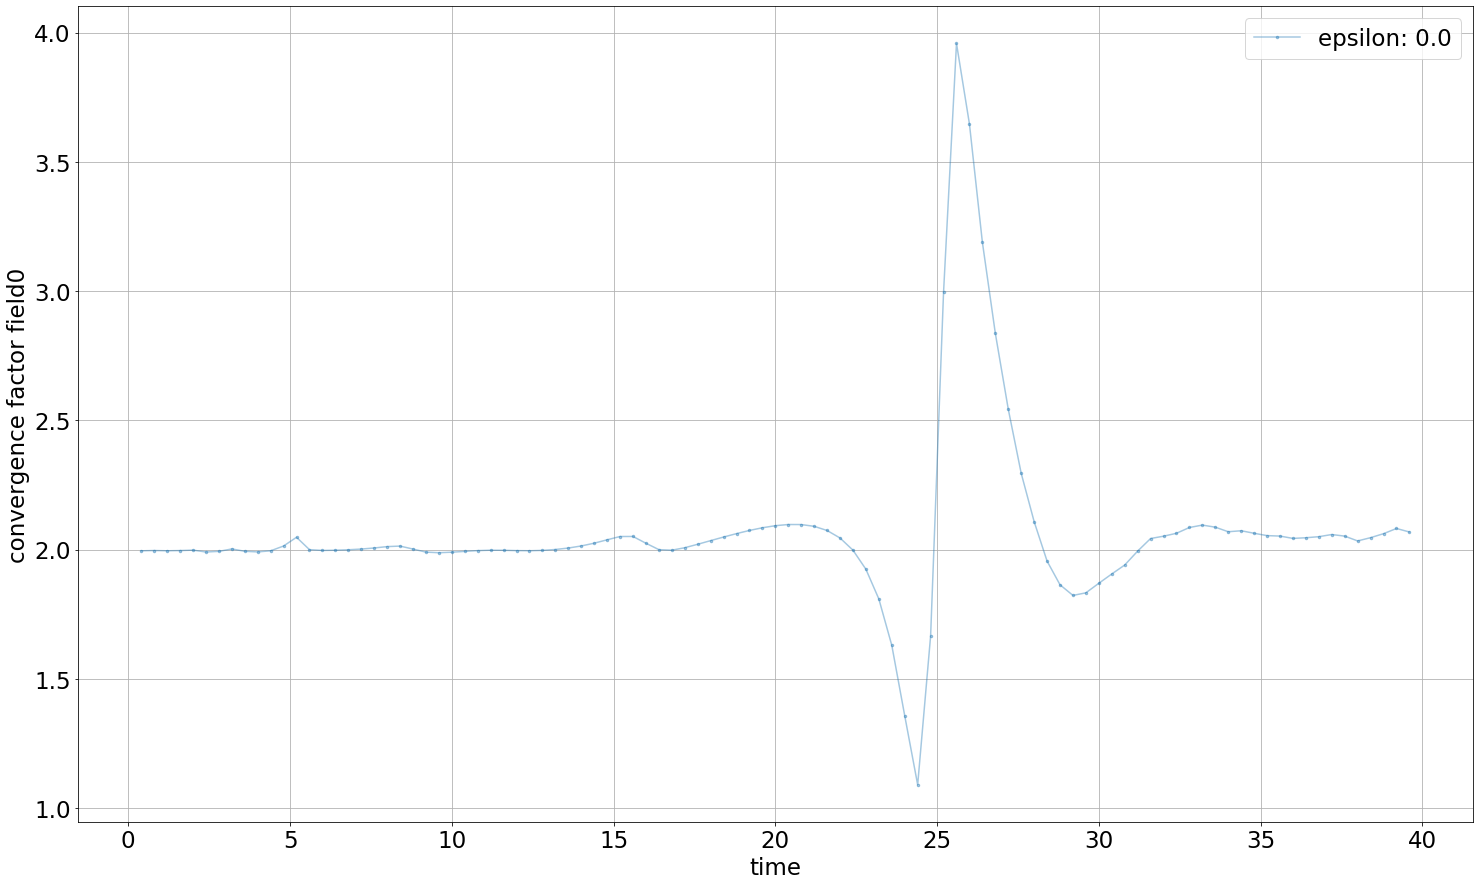

In [159]:
allruns_self_conv_test_vect = []
self_conv_test_vect = []
field = "field0"

for n in [0]:
    self_conv_test_vect = []
    for i,t in enumerate(times[0:-1]):
        self_conv_test_vect.append( self_conv_test_spherical(big_DF[n][0][i],big_DF[n][1][i],big_DF[n][2][i],gl,gr,field) )
        
    allruns_self_conv_test_vect.append(self_conv_test_vect)
    plt.plot(times[0:-1], self_conv_test_vect,'.-',markersize=5,alpha=0.4,label="epsilon: "+str(epsilon[n]))
#plt.xlim(0,30)
#plt.ylim(1.9,2.2)
plt.xlabel('time')
plt.ylabel('convergence factor '+ field)
plt.xlabel('time')
#plt.vlines(0.652,0,5,alpha=0.5,label="time = 9.4")
#plt.hlines(2,0,12,alpha=0.5,label="time = 9.4")

plt.grid()
plt.legend()

### Pointwise convergence
The function self_conv_test compute a difference vector between the resolution 0 and 1, and 4 times a difference vector between resolution 1 and 2. The two vector should theoretically coincide.

In [149]:
n_ind = 0
field = "field0"
self_conv_test_vect_pw = []
for j in range(0,number_steps-1):
    self_conv_test_vect_pw.append(self_conv_test_pw(big_DF[n_ind][0][j], big_DF[n_ind][1][j], big_DF[n_ind][2][j],gl,gr,field))
    #plt.plot(big_DF[n_ind][0][0]['x'][gl:-gr],self_conv_test_vect_pw[j][0]-self_conv_test_vect_pw[j][1],markersize=15)
    #plt.hlines(np.mean(self_conv_test_vect_pw[j]),-5,5,alpha=0.4)

#plt.plot(times,self_conv_test_vect_pw,label="conv_test")
#plt.xlim(-3.5,-3.7)
#plt.ylim(1.95,2.1)
#plt.xlabel('time')
#plt.ylabel('pointwise convergence factor')
#plt.grid()
#plt.legend()
#print(self_conv_test_vect_pw[-24])

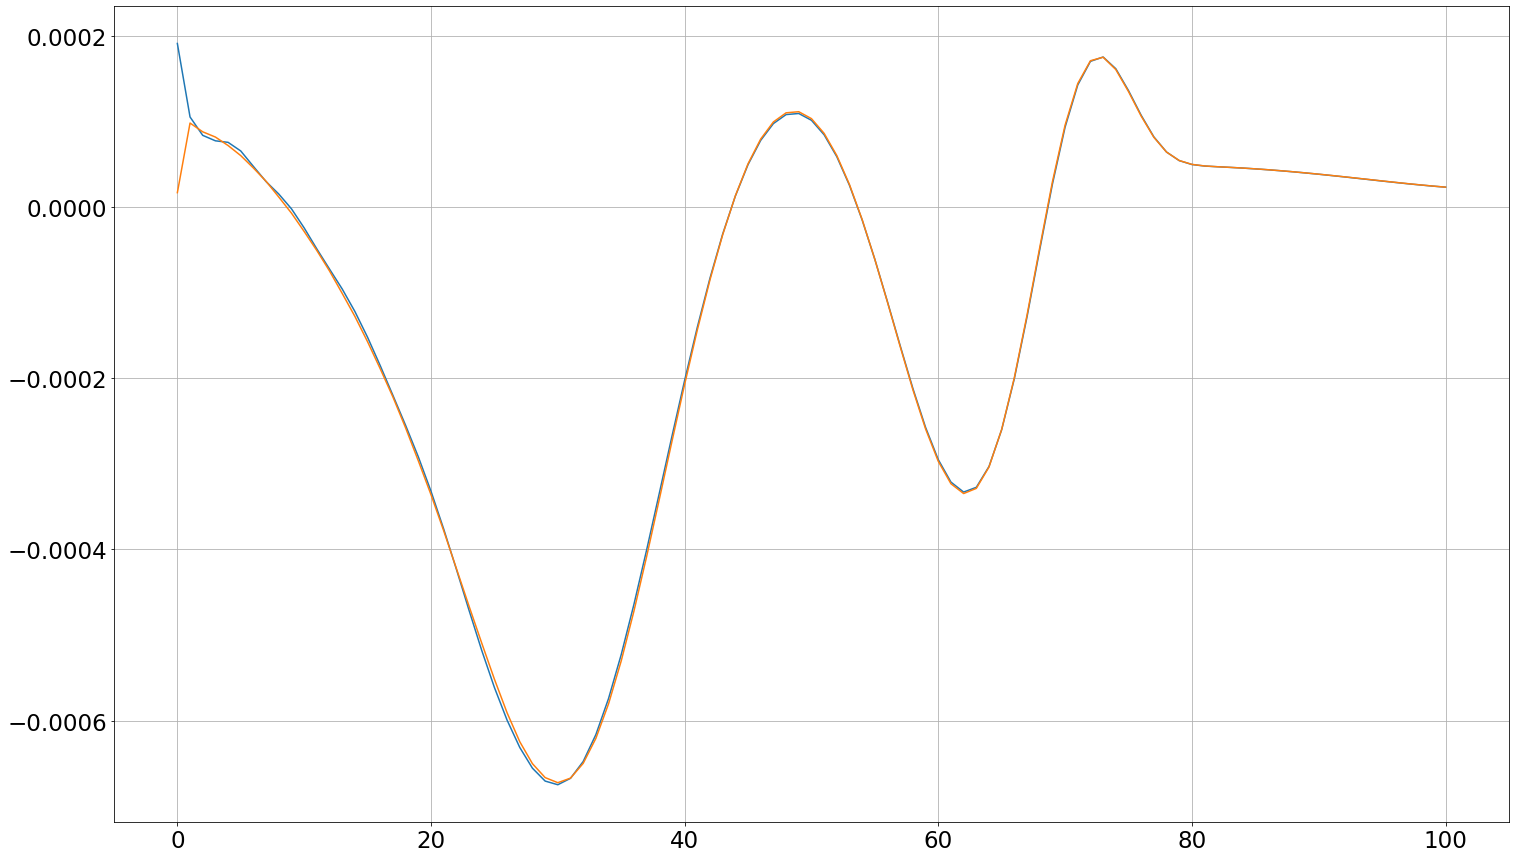

In [162]:
plt.plot(self_conv_test_vect_pw[4][0])
plt.plot(self_conv_test_vect_pw[4][1])
plt.grid()

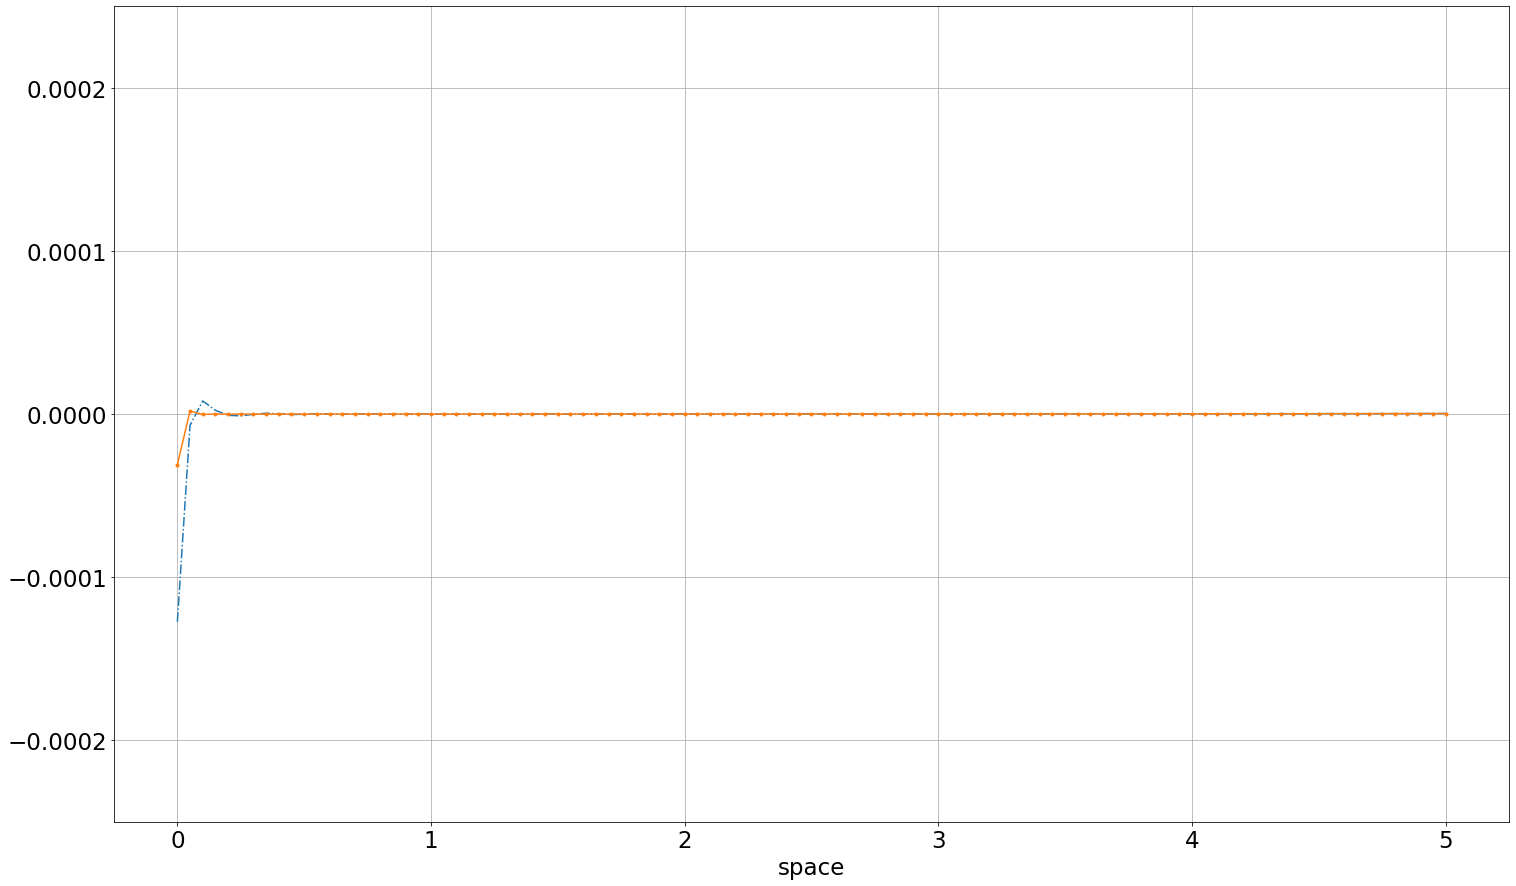

In [139]:
ylim_inf = -0.00025
ylim_sup = 0.00025
plot_pw_convergence(big_DF,gl,gr,self_conv_test_vect_pw,model,data,field,epsilon,n_ind,dx,number_steps,ylim_inf,ylim_sup)

## Evolutions' videos of the functions

### Animation of a singular field

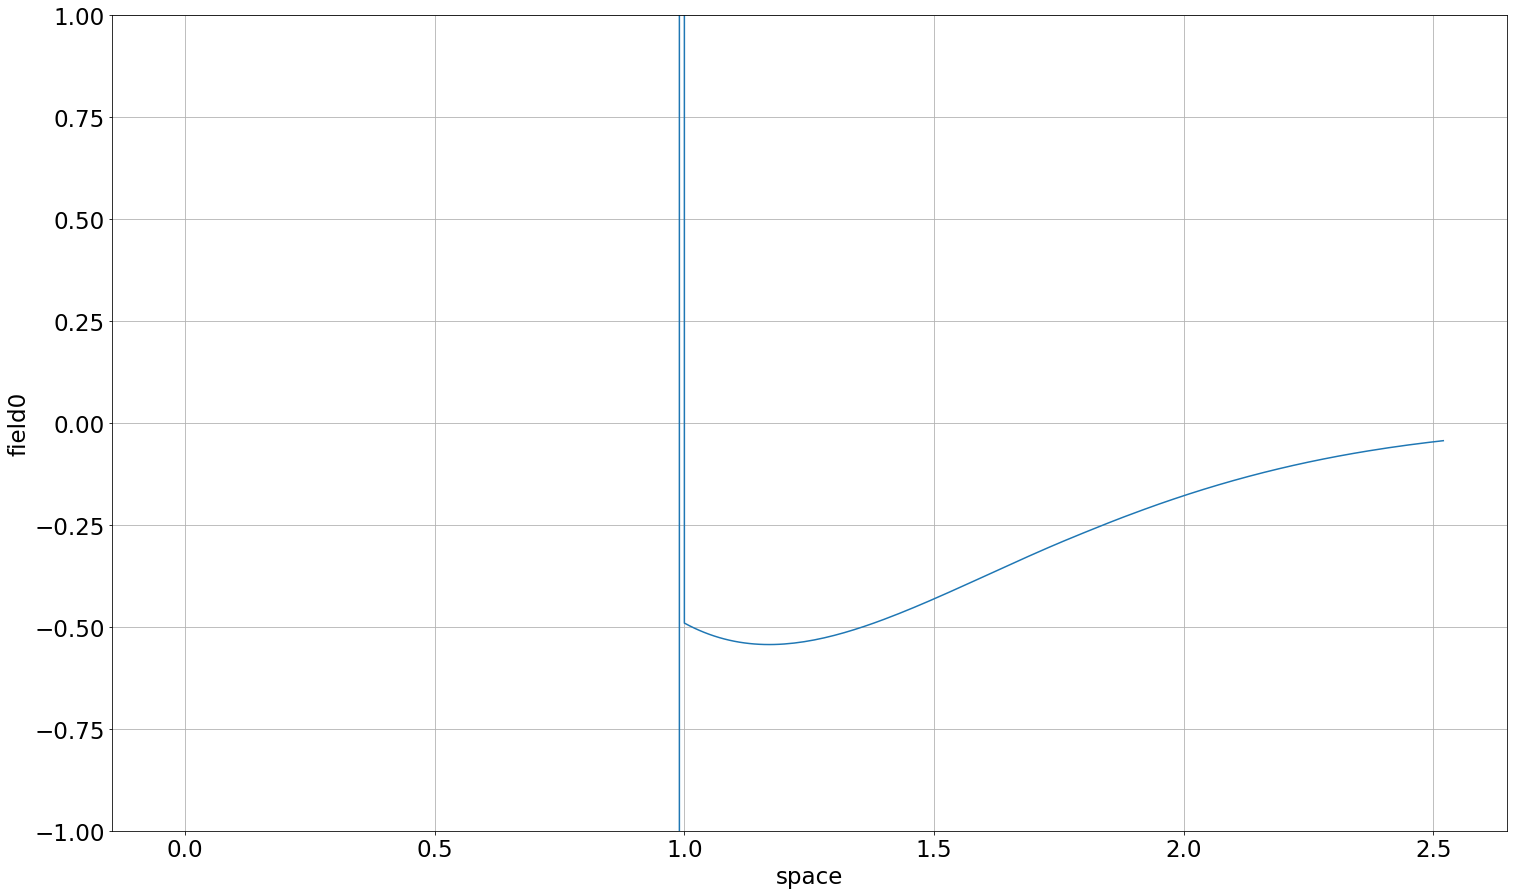

In [9]:
ylim_inf = -1
ylim_sup = 1
field_number = 0
h_ind = 0
big_DF_ind = 0
animate_one_field(field_number,h_ind,big_DF_ind,model,data,big_DF,ylim_inf,ylim_sup,number_steps)

### Animation of multiple fields

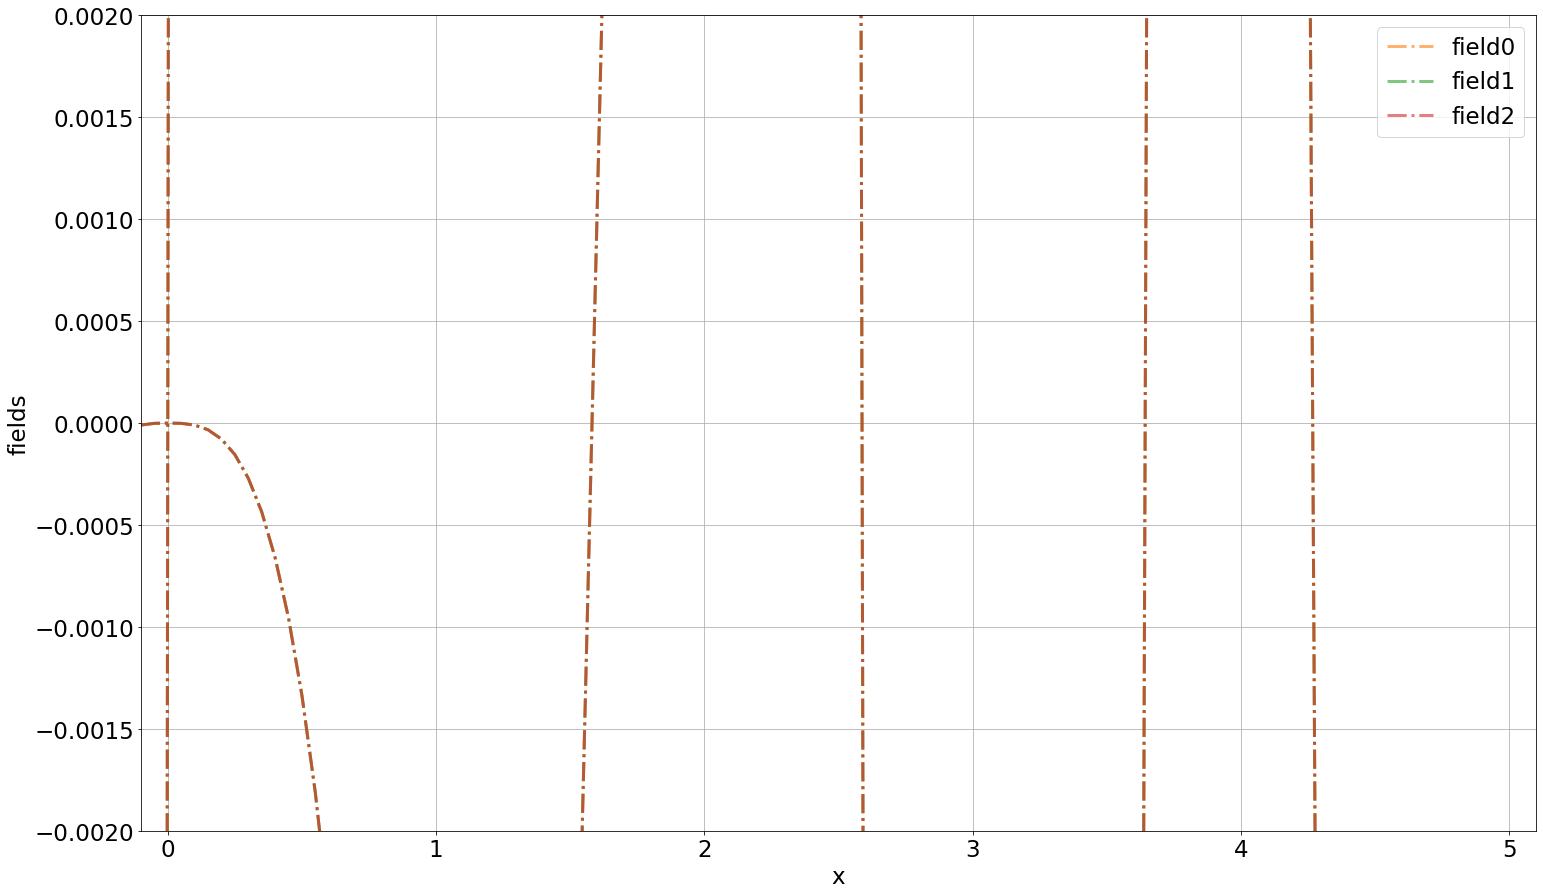

In [22]:
fields_to_print = ["field0","field1","field2"]
ylim_inf = -0.002
ylim_sup = 0.002
h_ind = 0
big_DF_ind = 0
animate_multiple_fields(big_DF,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,ylim_inf,ylim_sup,number_steps,domain_lenght)

### Theoretical comparisons

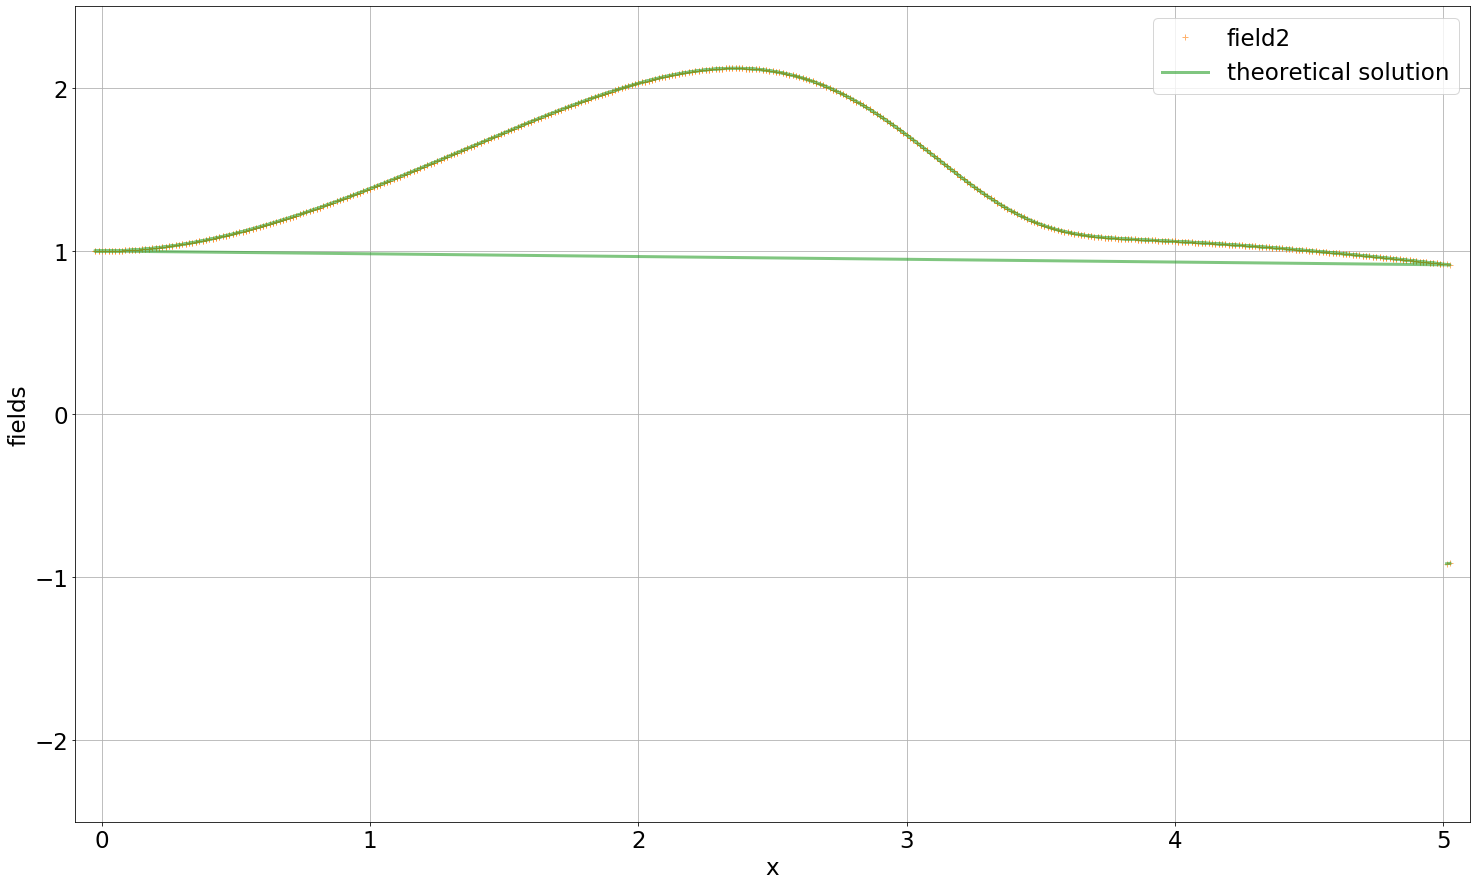

In [39]:
fields_to_print = ["field2","theoretical"]
ylim_inf = -2.5
ylim_sup = 2.5
h_ind = 2
big_DF_ind = 0
theoretical_comparison(big_DF,hyperbolic_chi_we_solution,fields_to_print,h_ind,big_DF_ind,model,data,dx,gl,gr,number_steps,domain_lenght,ylim_inf,ylim_sup,times,amplitude_vector)



## Plot of the power law scaling for the CSS and DSS models

In [7]:
# we compute the maximums over all times for each run (they have different initial amplitude)
maximums = runs_maximums_vector(big_DF,2,'field0')
amplitudes_vector = []
for n in range(len(amplitude_vector)):
    amplitudes_vector.append(amplitude_vector[n])
print('amplitudes:',amplitudes_vector)
for i in range(len(amplitudes_vector)):
    amplitudes_vector[i] = 2.3316439816+ amplitudes_vector[i]
amplitudes_for_fit = -np.log(amplitudes_vector[:]).reshape((-1, 1))
line_model = LinearRegression()
print(len(amplitudes_for_fit))
line_model.fit(amplitudes_for_fit,np.log(maximums))
print("maximum",maximums)
print('intercept:',line_model.intercept_,'angular coefficient', line_model.coef_)

amplitudes: [-2.313328, -2.316648, -2.319366, -2.321592, -2.323414, -2.324906, -2.326127, -2.327127, -2.327946, -2.328616, -2.329165, -2.329614, -2.329982, -2.330283, -2.33053]
15
maximum [16.3191, 18.0039, 19.8811, 21.9492, 24.2292, 26.7524, 29.5481, 32.6434, 36.0401, 39.7816, 44.0657, 48.5636, 53.9075, 59.3162, 66.1272]
intercept: 0.796531249552912 angular coefficient [0.49825299]


Text(0, 0.5, 'maximum PI overall times')

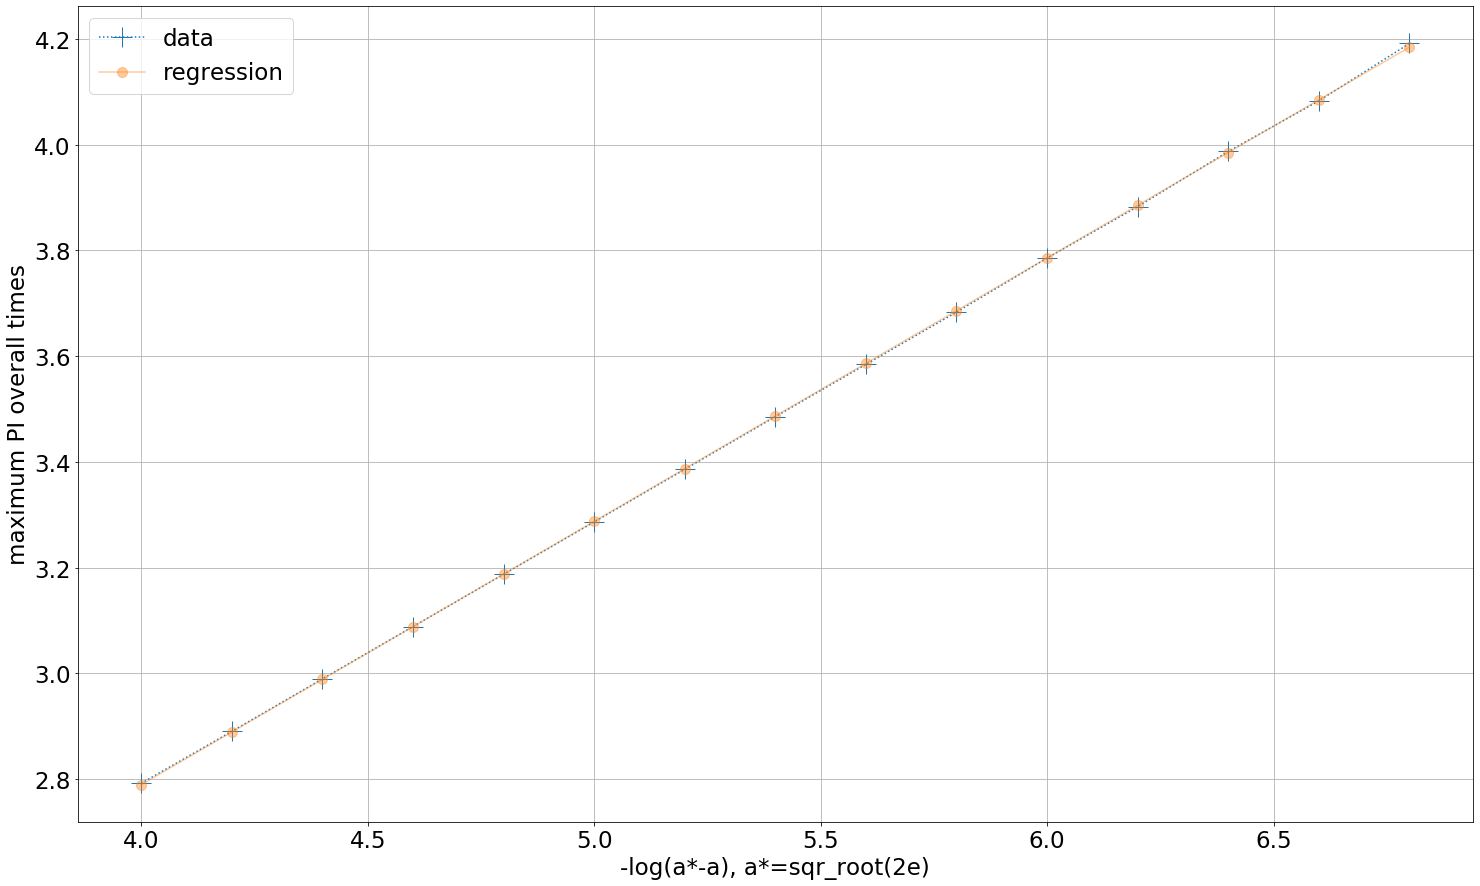

In [8]:
plt.plot(-np.log(amplitudes_vector),np.log(maximums),'+:',markersize=20,alpha=1,label='data')
plt.plot(-np.log(amplitudes_vector),line_model.predict(-np.log(amplitudes_vector).reshape(-1,1)),'.-',markersize=20,alpha=0.4,label='regression')
plt.grid()
plt.legend()
plt.xlabel('-log(a*-a), a*=sqr_root(2e)')
plt.ylabel('maximum PI overall times')
#RESULTS: intercept: 0.796531249552912 angular coefficient [0.49825299]

### Production of the amplitudes to analyze

In [6]:
amplitudes_vector_creator(4,7,2.3316439816,0.2)


array([2.31332834, 2.3166484 , 2.31936664, 2.32159215, 2.32341423,
       2.32490603, 2.32612742, 2.3271274 , 2.32794612, 2.32861643,
       2.32916523, 2.32961455, 2.32998242, 2.33028361, 2.33053021])

In [121]:
def hyperbolic_chi_we_solution(r,t,param):
    A = param[0]
    ds = param[1]
    s = param[2]
    R = r/(1-r**2/s**2)
    T = t+R-r
    Chi = (1+R**2)**0.5
    J = R-T
    L = (R+T)
    P = (A*np.exp(-ds**2*J**2)*J+A*np.exp(-ds**2*L**2)*L)/(2*R)
    return(P)

In [114]:
def theo_temporal_vector(X,times,theo_function,parameters):
    temporal_field = []
    for t in times:
        space_set = []
        for x in X:
            space_set.append(theo_function(x,t,parameters))
        temporal_field.append(space_set)
    return(temporal_field)

In [115]:
def hyperbolic_chi_m1_charvar_solution_Psi(r,t,param):
    A = param[0]
    ds = param[1]
    s = param[2]
    B = param[3]
    R = r/(1-r**2/s**2)
    T = t+R-r
    Chi = (1+R**2)**0.5
    return( np.log(1+B/(2*R)*(A*np.exp(-ds**2*(R-T)**2)*(R-T)+A*np.exp(-ds**2*(R+T)**2)*(R+T))) )


In [116]:
def hyperbolic_chi_m3_charvar_solution_Psi2Plus(r,t,param):
    A = param[0]
    ds = param[1]
    s = param[2]
    B = param[3]
    C = param[4]
    R = r/(1-r**2/s**2)
    T = t+R-r
    Chi = (1+R**2)**0.5
    J = R-T
    K = np.exp(4*ds**2*R*T)
    L = (R+T)
    M = R**2+T**2
    N = B*A*(np.exp(-ds**2*J**2)*J+np.exp(-ds**2*L**2)*L)/2/R
    P = np.log(1+N)/C
    Q = np.log(1+(A*np.exp(-ds**2*J**2)*J+A*np.exp(-ds**2*L**2)*L)/2/R)/C
    return(A*np.exp(ds**2*J**2)*np.sin(Q)*(J*K+(-1+4*ds**2*L**2)*R+T)*Chi**2 )/R/(A*np.exp(ds**2*J**2)*(J*K+L)+2*np.exp(2*ds**2*M)*R)

In [128]:
def hyp_model3_gaussian_solution(r,t,param):
    A = param[0]
    ds = param[1]
    s = param[2]
    B = param[3]
    C = param[4]
    R = r/(1-r**2/s**2)
    T = t+R-r
    J = R-T
    L = (R+T)
    Chi = (R*R+1.)**0.5
    P = (A*np.exp(-ds**2*J**2)*J+A*np.exp(-ds**2*L**2)*L)/R/2
    Q = np.log(1+P)/C
    return(C*np.sin(Q))

In [131]:
#4.663
big_DF_ind=0
ds = 1
h_ind = 0
time_line = np.arange(0,7,0.01)
domain = np.arange(0,5,0.01)
theo_temporal_field = theo_temporal_vector(domain,time_line,hyp_model3_gaussian_solution,[2.23973076,1,5,1,1])

/home/giulio/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Text(0, 0.5, 't')

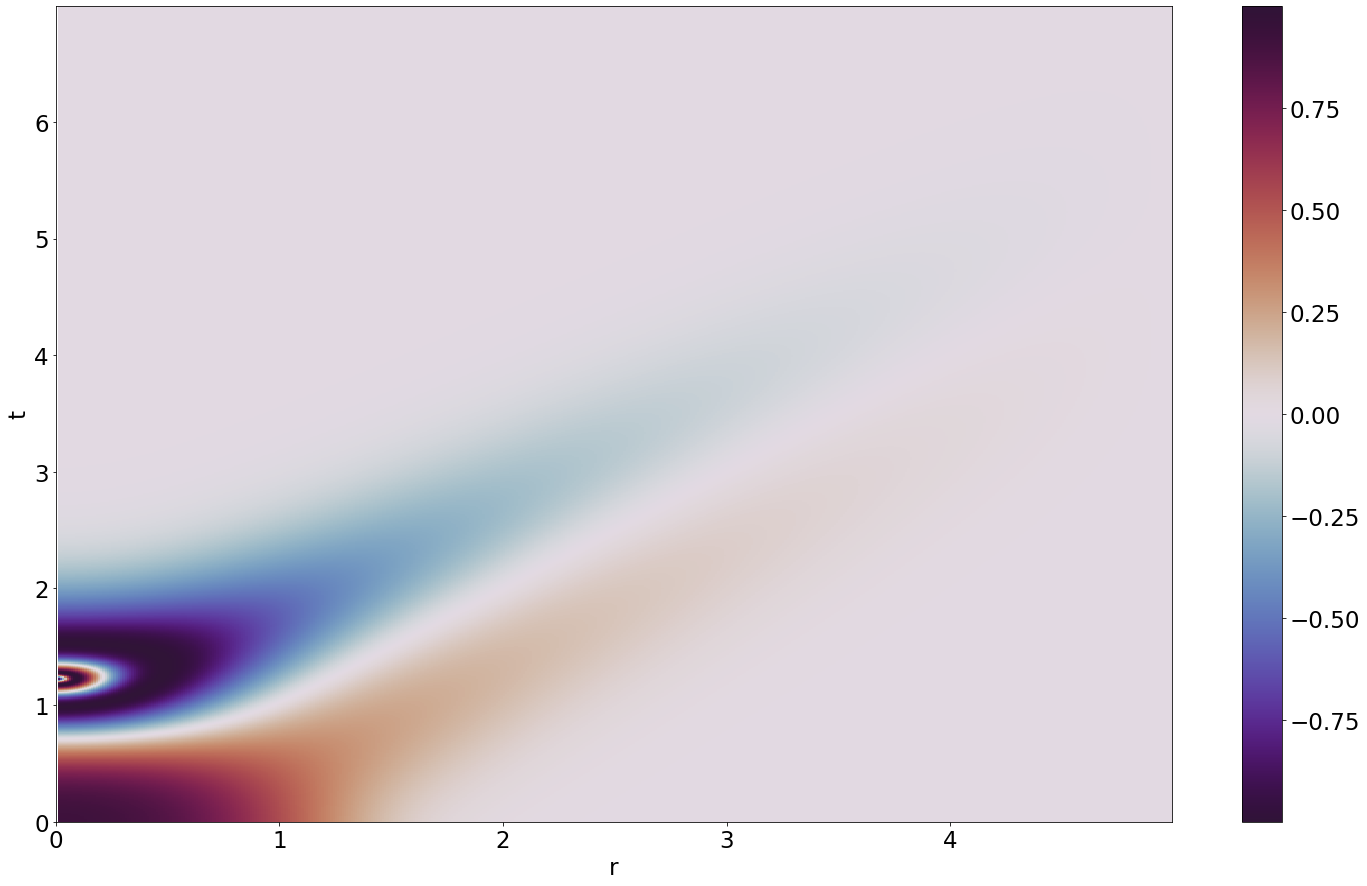

In [133]:
y = times[:-1]
x = domain
plt.pcolormesh(x,time_line,theo_temporal_field,cmap='twilight_shifted')
plt.colorbar( orientation="vertical")
#plt.ylim([1.15,1.35])
#plt.xlim([0,0.05])
plt.xlabel('r')
plt.ylabel('t')
#plt.title(fields[field_ind])